In [102]:
!pip install pmdarima

You should consider upgrading via the 'C:\Users\bajaj\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.dates as mdates
import scipy.stats
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pylab
sns.set(style='white')
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [104]:
df=pd.read_csv(r"C:\Users\bajaj\Desktop\RELIANCE.csv")
df1=pd.read_csv(r"C:\Users\bajaj\Desktop\TATAMOTORS (1).csv")

In [105]:
df2=df.copy()

In [106]:
df['Date']=pd.to_datetime(df.Date)
df.set_index(['Date'],inplace=True)

C:\Users\bajaj\AppData\Local\Temp\ipykernel_15340\2558195460.py:1: UserWarning:

Parsing '13-01-2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\bajaj\AppData\Local\Temp\ipykernel_15340\2558195460.py:1: UserWarning:

Parsing '14-01-2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\bajaj\AppData\Local\Temp\ipykernel_15340\2558195460.py:1: UserWarning:

Parsing '17-01-2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\bajaj\AppData\Local\Temp\ipykernel_15340\2558195460.py:1: UserWarning:

Parsing '18-01-2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\bajaj\AppData\Local\Temp\ipykernel_15340\2558195460.py:1: UserWarning:

Parsing '19-01-2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent 

In [107]:
#df1['Date']=pd.to_datetime(df1.Date)
df1.set_index(['Date'],inplace=True)

In [108]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-03-01,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111320e+14,NaN,NaN,NaN
2000-04-01,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500220e+14,NaN,NaN,NaN
2000-05-01,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373700e+14,NaN,NaN,NaN
2000-06-01,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633250e+14,NaN,NaN,NaN
2000-07-01,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138390e+14,NaN,NaN,NaN


In [109]:
df.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2021-04-26,RELIANCE,EQ,1904.35,1920.00,1962.0,1911.50,1938.00,1937.85,1941.32,9620785,1.867700e+15,259137.0,4276703.0,0.4445
2021-04-27,RELIANCE,EQ,1937.85,1940.00,1997.2,1938.25,1990.00,1988.65,1978.64,9226547,1.825600e+15,291197.0,3772144.0,0.4088
2021-04-28,RELIANCE,EQ,1988.65,1997.85,2008.0,1980.15,1993.15,1997.30,1997.60,7902002,1.578510e+15,247331.0,3921560.0,0.4963
2021-04-29,RELIANCE,EQ,1997.30,2022.90,2044.5,2007.30,2020.00,2024.05,2024.21,8035915,1.626630e+15,213153.0,2834103.0,0.3527
2021-04-30,RELIANCE,EQ,2024.05,2008.50,2036.0,1987.55,1995.90,1994.50,2010.20,9150974,1.839530e+15,288687.0,3902504.0,0.4265


In [110]:
df.shape

(5306, 14)

In [111]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2.456000e+03,4.792000e+03,4792.000000
mean,1010.984866,1012.602375,1026.823803,996.886977,1011.157143,1011.316839,1011.937409,5.583028e+06,6.076636e+14,1.452306e+05,2.280885e+06,0.435039
std,570.987079,572.575893,581.986757,560.703328,570.938608,571.046753,571.222520,4.983793e+06,8.368509e+14,1.297557e+05,1.882665e+06,0.144722
min,203.200000,205.500000,219.500000,197.150000,203.300000,203.200000,212.290000,5.282000e+04,4.295540e+12,2.991000e+03,2.909700e+04,0.076300
25%,572.137500,572.925000,582.950000,564.237500,572.062500,572.512500,573.190000,2.836454e+06,2.203352e+14,7.215900e+04,1.194524e+06,0.323325
50%,937.950000,939.000000,950.075000,927.550000,939.025000,938.275000,939.785000,4.213432e+06,3.663000e+14,1.021435e+05,1.810434e+06,0.449450
75%,1247.387500,1247.675000,1267.350000,1227.450000,1248.287500,1248.275000,1247.375000,6.602604e+06,6.656492e+14,1.686702e+05,2.752935e+06,0.544300
max,3220.850000,3298.000000,3298.000000,3141.300000,3223.000000,3220.850000,3197.750000,6.523089e+07,1.470000e+16,1.428490e+06,3.495888e+07,0.978300


In [112]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [113]:
missing_table=missing_values_table(df);
missing_table


Your selected dataframe has 14 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Trades,2850,53.7
Deliverable Volume,514,9.7
%Deliverble,514,9.7


<AxesSubplot: xlabel='Date'>

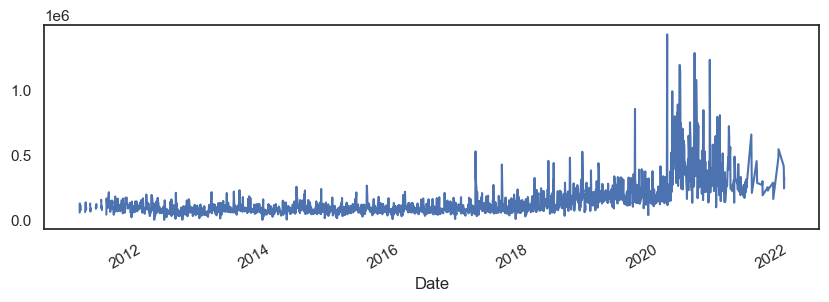

In [114]:
df.Trades.plot(figsize=(10,3))

In [115]:
df.Trades[:2850]

Date
2000-03-01   NaN
2000-04-01   NaN
2000-05-01   NaN
2000-06-01   NaN
2000-07-01   NaN
              ..
2011-05-25   NaN
2011-05-26   NaN
2011-05-27   NaN
2011-05-30   NaN
2011-05-31   NaN
Name: Trades, Length: 2850, dtype: float64

In [116]:
df.drop(['Trades','Deliverable Volume','%Deliverble'],axis=1,inplace=True)
df1.drop(['Trades','Deliverable Volume','%Deliverble'],axis=1,inplace=True)

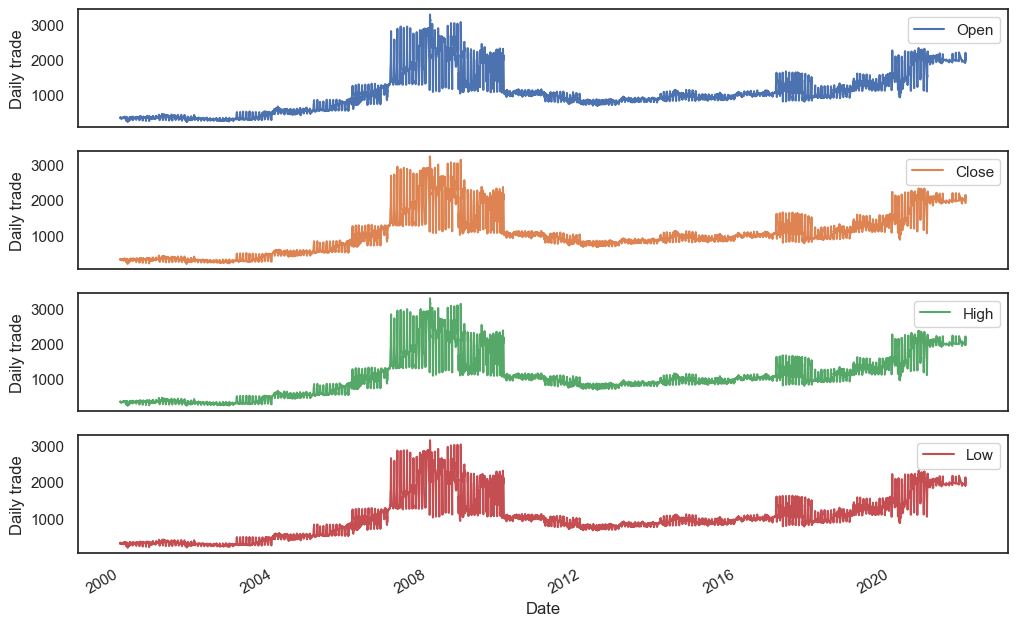

In [117]:
cols_plot = ['Open', 'Close', 'High','Low']
axes = df[cols_plot].plot(figsize=(12,8), subplots=True)


for ax in axes:
    ax.set_ylabel('Daily trade')

<AxesSubplot: xlabel='Date'>

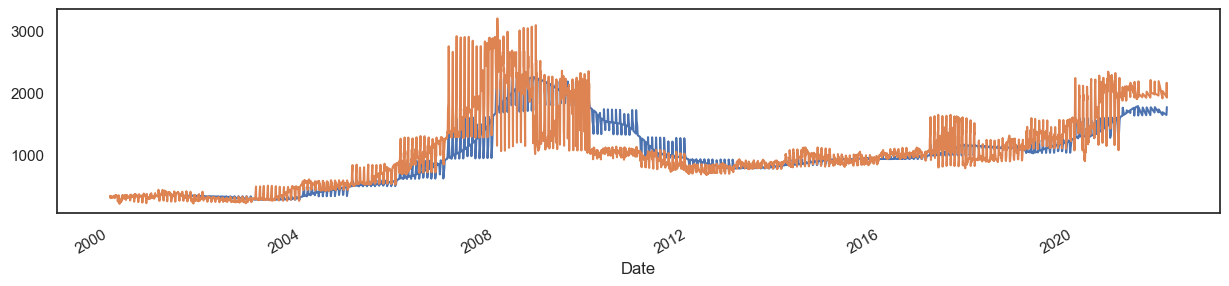

In [118]:
df['VWAP'].rolling(365).mean().plot(figsize=(15,4))
df['VWAP'].plot(figsize=(15,3))

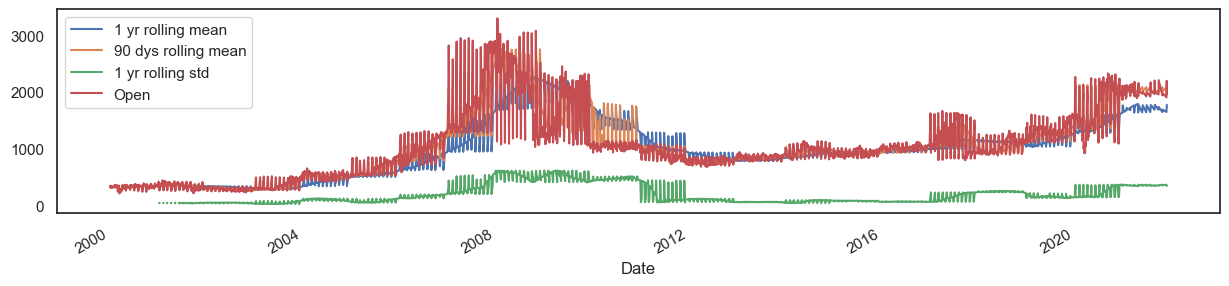

In [119]:
df['Open'].rolling(365).mean().plot(figsize=(15,3),label='1 yr rolling mean')
df['Open'].rolling(90).mean().plot(figsize=(15,3),label='90 dys rolling mean')
df['Open'].rolling(365).std().plot(figsize=(15,3),label='1 yr rolling std')
df['Open'].plot(figsize=(15,3))
plt.legend()

C:\Users\bajaj\AppData\Local\Temp\ipykernel_15340\2029181125.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<AxesSubplot: xlabel='VWAP', ylabel='Density'>

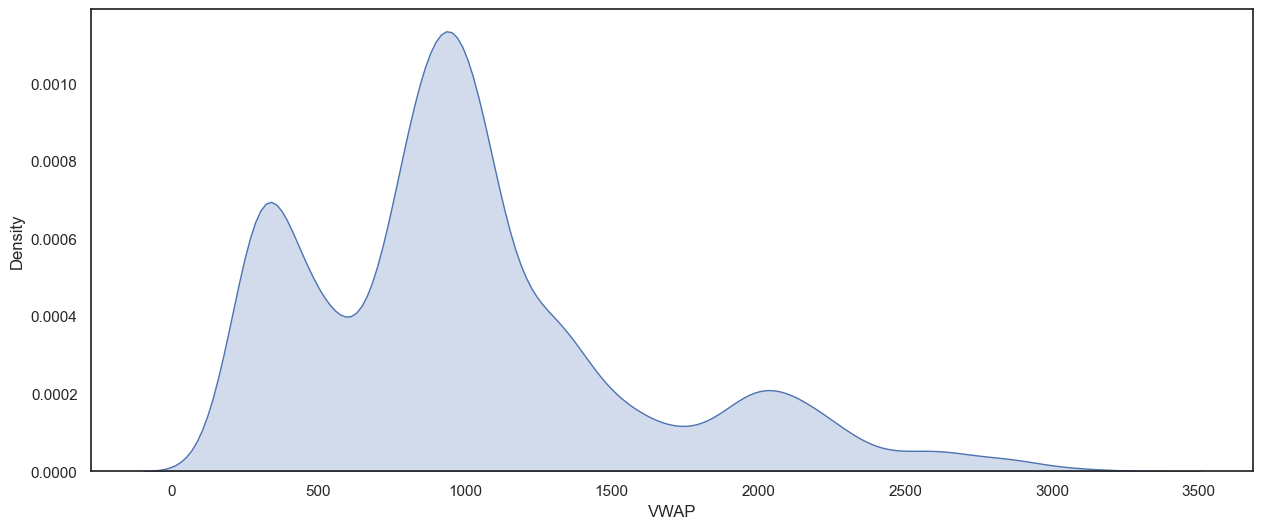

In [120]:
sns.kdeplot(df['VWAP'],shade=True)

In [121]:
print(df.Open.min())
print(df.Close.min())
print(df.VWAP.min())

205.5
203.2
212.29


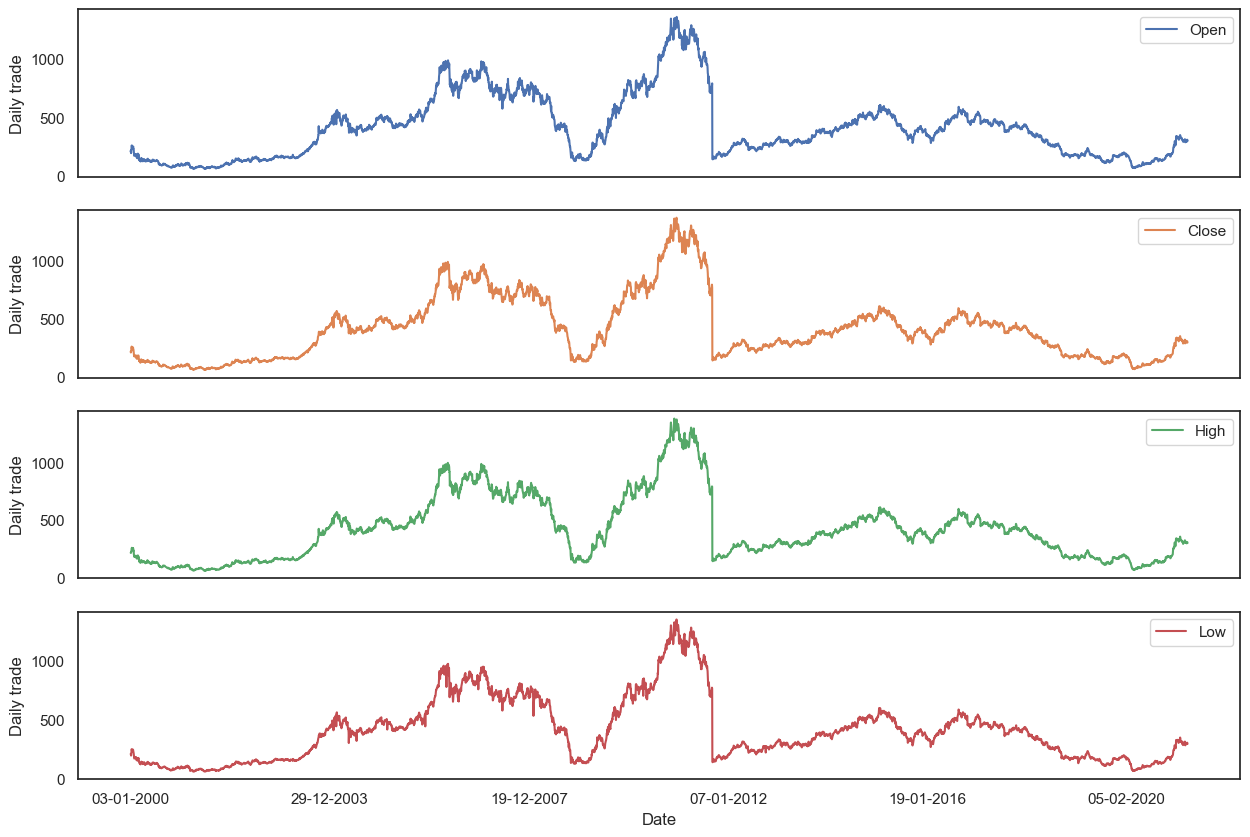

In [122]:
cols_plot = ['Open', 'Close', 'High','Low']
axes = df1[cols_plot].plot(figsize=(15,10), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

<AxesSubplot: xlabel='Date'>

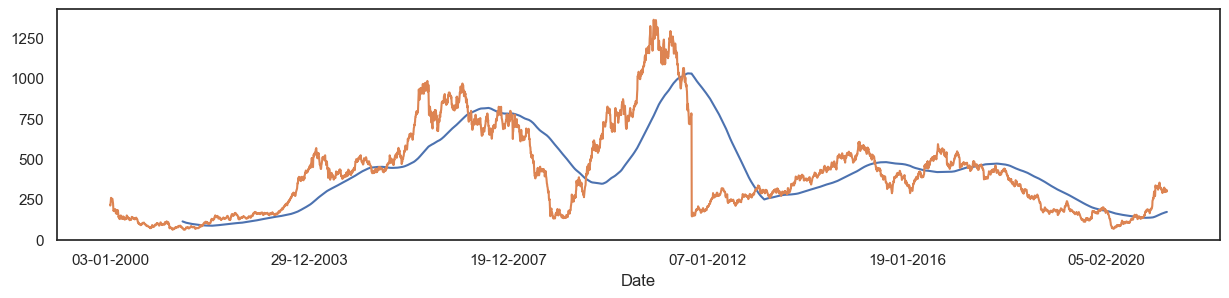

In [123]:
df1['VWAP'].rolling(365).mean().plot()
df1['VWAP'].plot(figsize=(15,3))

In [124]:
fig = go.Figure([go.Scatter(x=df.index, y=df['Volume'])])
fig.update_layout(
    autosize=False,
    width=1500,
    height=500,
    template='simple_white',
    title='Volume over time'
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="Volume")
fig.show()

In [125]:
fig = go.Figure([go.Scatter(x=df.index, y=df['VWAP'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='VWAP over time',
    template="simple_white",
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="VWAP")
fig.show()

In [126]:
def dicky_fuller_test(x):
    result = adfuller(x)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[1]>0.05:
        print("Fail to reject the null hypothesis (H0), the data is non-stationary")
    else:
        print("Reject the null hypothesis (H0), the data is stationary.")

In [127]:
dicky_fuller_test(df['VWAP'])

ADF Statistic: -1.837362
p-value: 0.362077
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Fail to reject the null hypothesis (H0), the data is non-stationary


C:\Users\bajaj\AppData\Local\Temp\ipykernel_15340\1127013854.py:1: UserWarning:

Parsing '13-01-2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\bajaj\AppData\Local\Temp\ipykernel_15340\1127013854.py:1: UserWarning:

Parsing '14-01-2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\bajaj\AppData\Local\Temp\ipykernel_15340\1127013854.py:1: UserWarning:

Parsing '17-01-2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\bajaj\AppData\Local\Temp\ipykernel_15340\1127013854.py:1: UserWarning:

Parsing '18-01-2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\bajaj\AppData\Local\Temp\ipykernel_15340\1127013854.py:1: UserWarning:

Parsing '19-01-2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent 

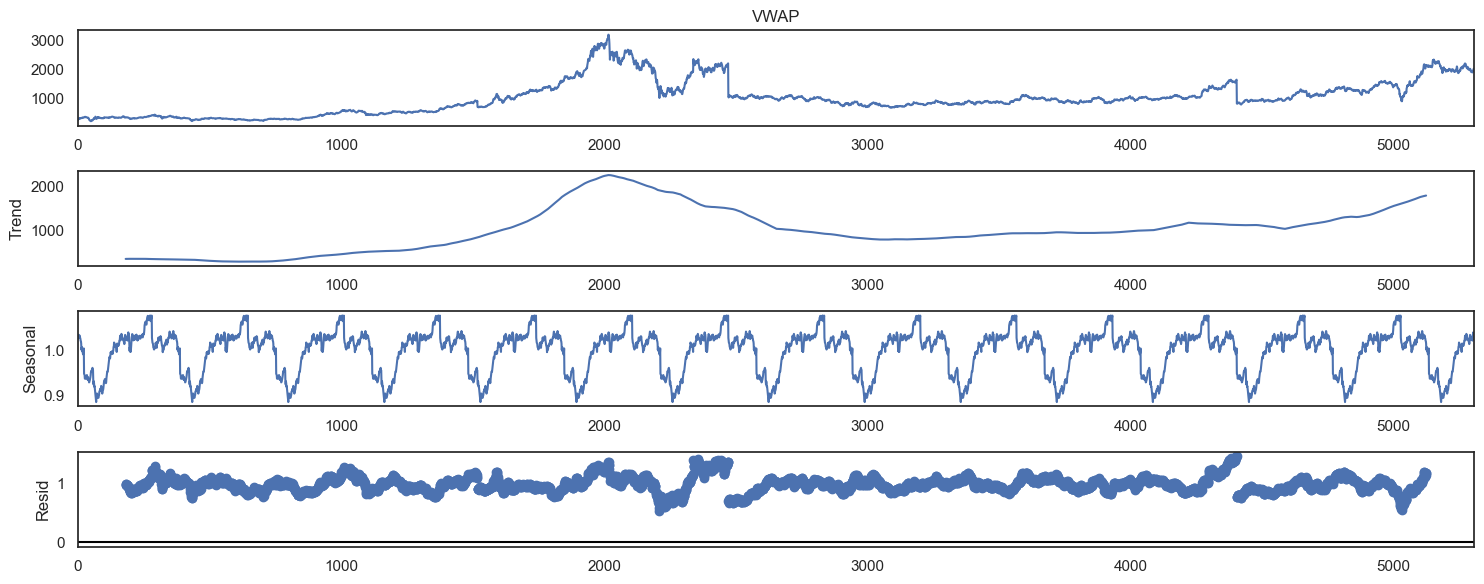

In [128]:
df2['Date']=pd.to_datetime(df2.Date,infer_datetime_format=True)
# df2.set_index(['Date'],inplace=True)
plt.rcParams.update({'figure.figsize': (15,6)})
decompose=seasonal_decompose(df2['VWAP'],model='multiplicative',period=365)
fig=decompose.plot()


ADF Statistic: -2.845468
p-value: 0.052067
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Fail to reject the null hypothesis (H0), the data is non-stationary


<AxesSubplot: xlabel='Date'>

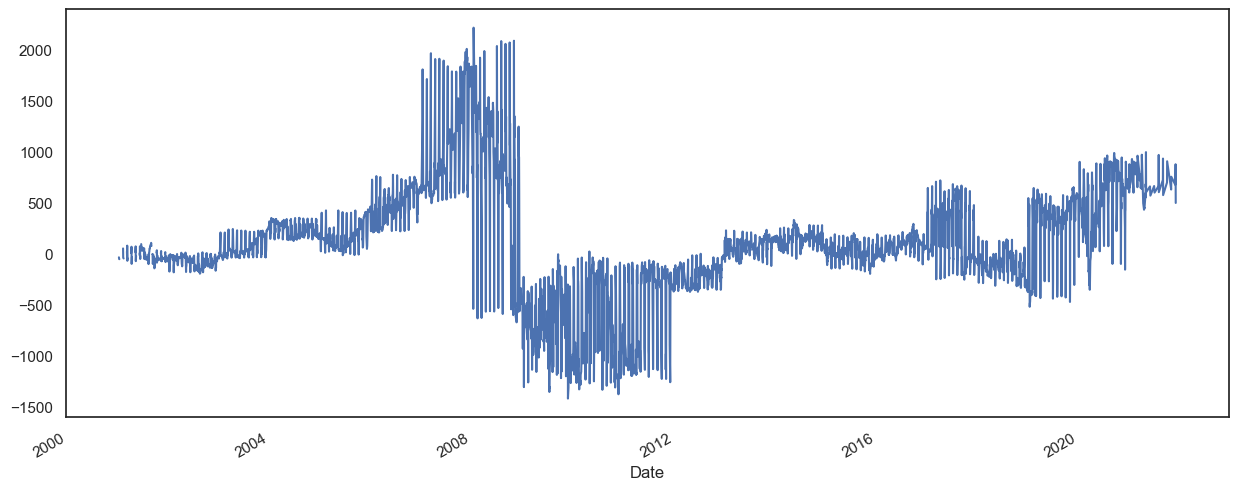

In [129]:
df['seasonaldiff']=df['VWAP']-df['VWAP'].shift(365)
dicky_fuller_test(df['seasonaldiff'].dropna())
df['seasonaldiff'].plot()


ADF Statistic: -8.615200
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Reject the null hypothesis (H0), the data is stationary.


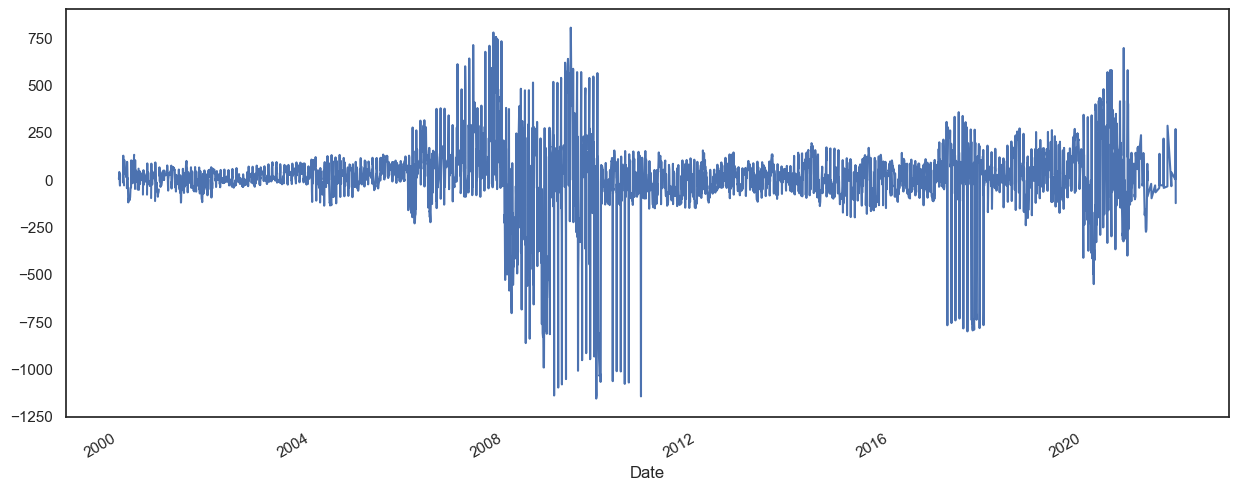

In [130]:
df['monthdiff']=df['VWAP']-df['VWAP'].shift(30)
df['monthdiff'].plot()
dicky_fuller_test(df['monthdiff'].dropna())

ADF Statistic: -16.062163
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Reject the null hypothesis (H0), the data is stationary.


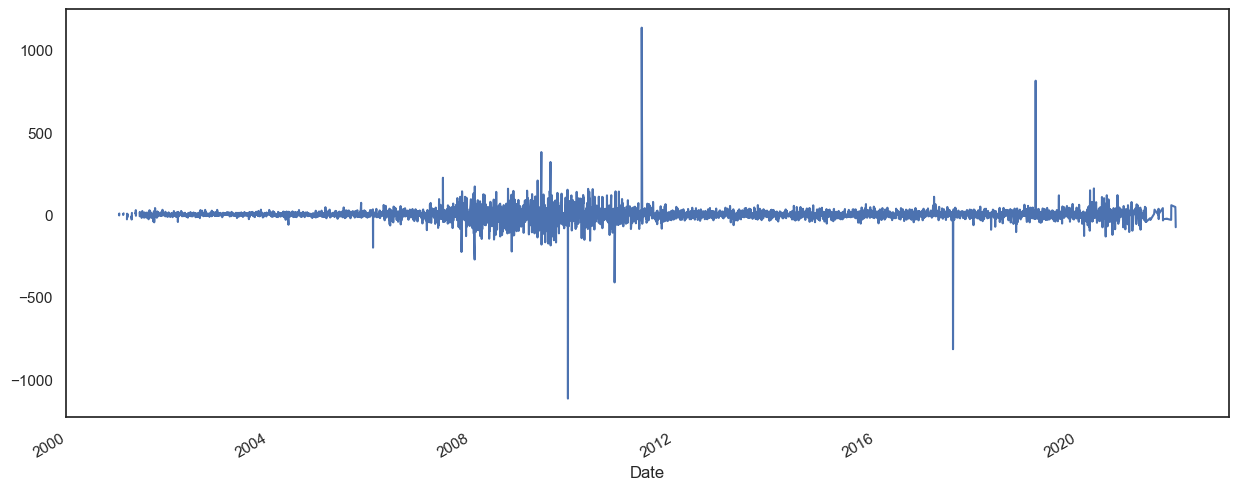

In [131]:
df['daydiff']=df['VWAP']-df['VWAP'].shift(1)
df['season1diff']=df['daydiff']-df['daydiff'].shift(365)
df['season1diff'].plot()
dicky_fuller_test(df['season1diff'].dropna())


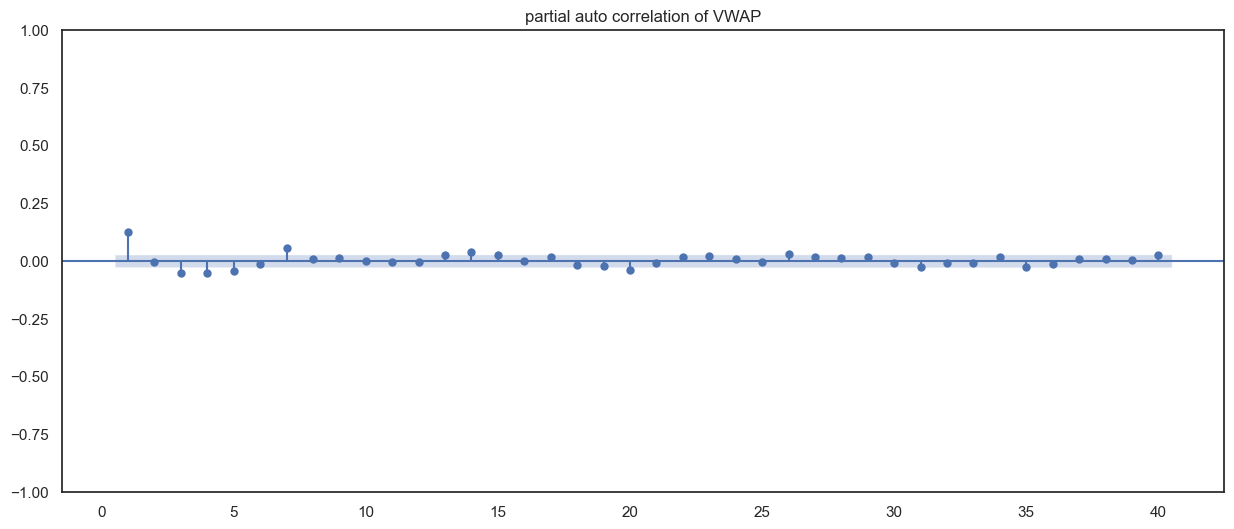

In [132]:
sm.graphics.tsa.plot_acf(df['daydiff'].iloc[1:], lags=40,title='partial auto correlation of VWAP',zero=False)
plt.show()


c:\Users\bajaj\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



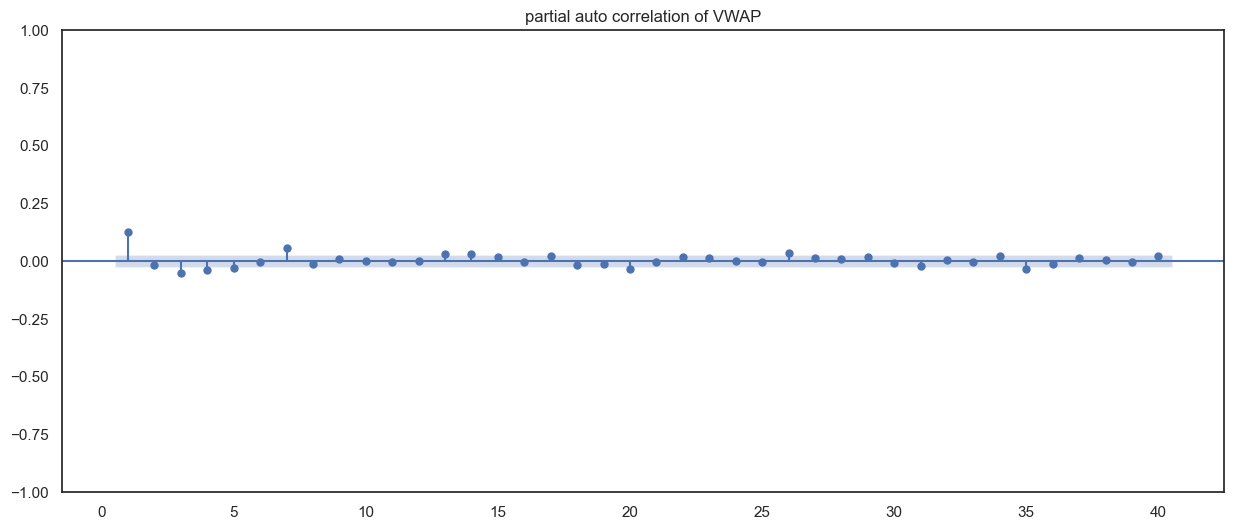

In [133]:
sm.graphics.tsa.plot_pacf(df['daydiff'].iloc[1:], lags=40,title='partial auto correlation of VWAP',zero=False)
plt.show()

In [135]:
# df['Date']=pd.to_datetime(df.Date)
# df.set_index(['Date'],inplace=True)
# df=df.reset_index()
# df.Date = pd.to_datetime(df.Date,infer_datetime_format=True)
# df["month"] = df.Date.dt.month
# df["week"] = df.Date.dt.week
# df["day"] = df.Date.dt.day
# df["day_of_week"] = df.Date.dt.dayofweek
# df.head()


In [ ]:
# lag_features = ["High", "Low", "Volume", "Turnover","Close"]
# window1 = 3
# window2 = 7
# window3 = 30

# df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
# df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
# df_rolled_30d = df[lag_features].rolling(window=window3, min_periods=0)

# df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
# df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
# df_mean_30d = df_rolled_30d.mean().shift(1).reset_index().astype(np.float32)

# df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
# df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
# df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(np.float32)

# for feature in lag_features:
#     df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
#     df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
#     df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
#     df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
#     df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
#     df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

# df.fillna(df.mean(), inplace=True)

# # df.set_index("Date", drop=False, inplace=True)

In [ ]:
# df_train = df[df.Date < "2019"]
# df_valid = df[df.Date >= "2019"]
# exogenous_features = ["High_mean_lag3", "High_std_lag3", "Low_mean_lag3", "Low_std_lag3",
#                       "Volume_mean_lag3", "Volume_std_lag3", "Turnover_mean_lag3",
#                       "Turnover_std_lag3","High_mean_lag7", "High_std_lag7", "Low_mean_lag7", "Low_std_lag7",
#                       "Volume_mean_lag7", "Volume_std_lag7", "Turnover_mean_lag7",
#                       "Turnover_std_lag7","High_mean_lag30", "High_std_lag30", "Low_mean_lag30", "Low_std_lag30",
#                       "Volume_mean_lag30", "Volume_std_lag30", "Turnover_mean_lag30",
#                       "Close_mean_lag3", "Close_mean_lag7","Close_mean_lag30","Close_std_lag3","Close_std_lag7","Close_std_lag30",
#                       "Turnover_std_lag30","month","week","day","day_of_week"]

In [ ]:
reliance_lag["Month"] = reliance_lag.Date.dt.month
reliance_lag["Week"] = reliance_lag.Date.dt.week
reliance_lag["Day"] = reliance_lag.Date.dt.day
reliance_lag["Day of week"] = reliance_lag.Date.dt.dayofweek
exogenous_features = ['High_mean_lag3','High_mean_lag7', 'High_mean_lag30', 'High_std_lag3', 'High_std_lag7',
       'High_std_lag30', 'Low_mean_lag3', 'Low_mean_lag7', 'Low_mean_lag30',
       'Low_std_lag3', 'Low_std_lag7', 'Low_std_lag30', 'Volume_mean_lag3',
       'Volume_mean_lag7', 'Volume_mean_lag30', 'Volume_std_lag3',
       'Volume_std_lag7', 'Volume_std_lag30', 'VWAP_mean_lag3',
       'VWAP_mean_lag7', 'VWAP_mean_lag30', 'VWAP_std_lag3', 'VWAP_std_lag7',
       'VWAP_std_lag30','Month', 'Week', 'Day', 'Day of week']


C:\Users\bajaj\AppData\Local\Temp\ipykernel_15340\1226146560.py:2: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



In [ ]:
train = reliance_lag[reliance_lag.Date < "2019"]
valid = reliance_lag[reliance_lag.Date >= "2019"]

In [ ]:
# model = auto_arima(df_train.VWAP,m=1,start_P=0, seasonal=True,d=1,trace=True, error_action="ignore", suppress_warnings=True)
# model.fit(df_train.VWAP)
# # stepwise_model = auto_arima(df['VWAP'], start_p=1, start_q=1,
# #                            max_p=2, max_q=2, m=365,
# #                            start_P=0, seasonal=True,
# #                            d=1, D=1, trace=True,
# #                            error_action='ignore',  
# #                            suppress_warnings=True, 
# #                            stepwise=True)
# # print(stepwise_model.aic())
model = auto_arima(train.Close, exogenous=train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(train.Close, exogenous=train[exogenous_features])

valid["Forecast_ARIMAX"] = model.predict(n_periods=len(valid), exogenous=valid[exogenous_features])



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=46534.334, Time=1.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=46575.276, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=46571.295, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=46571.287, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=46573.420, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=46562.819, Time=0.75 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=46560.346, Time=1.20 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=46535.054, Time=2.42 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=46535.045, Time=1.99 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=46573.282, Time=0.40 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=46546.351, Time=0.61 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=46543.550, Time=0.96 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=46535.601, Time=2.15 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=46532.482, Time=0.77 sec
 ARIMA(1,1,2)(0,0,0

c:\Users\bajaj\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\bajaj\AppData\Local\Temp\ipykernel_15340\1932437642.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4729
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -23261.241
Date:                Sat, 01 Jul 2023   AIC                          46532.482
Time:                        11:53:53   BIC                          46564.788
Sample:                             0   HQIC                         46543.837
                               - 4729                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2250      0.033     37.263      0.000       1.161       1.289
ar.L2         -0.8369      0.034    -24.703      0.000      -0.903      -0.770
ma.L1         -1.1848      0.037    -31.825      0.000      -1.258      -1.112
ma.L2          0.7812      0.038     20.311      0.000       0.706       0.857
sigma2      1098.6224      1.959    560.872      0.000    1094.783    1102.461
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):          27548086.17
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               5.91   Skew:                           -11.48
Prob(H) (two-sided):                  0.00   Kurtosis:                       376.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
valid["Forecast_ARIMAX"]

Date
2019-01-01   NaN
2019-02-01   NaN
2019-03-01   NaN
2019-04-01   NaN
2019-07-01   NaN
              ..
2021-04-26   NaN
2021-04-27   NaN
2021-04-28   NaN
2021-04-29   NaN
2021-04-30   NaN
Name: Forecast_ARIMAX, Length: 577, dtype: float64

<AxesSubplot: xlabel='Date'>

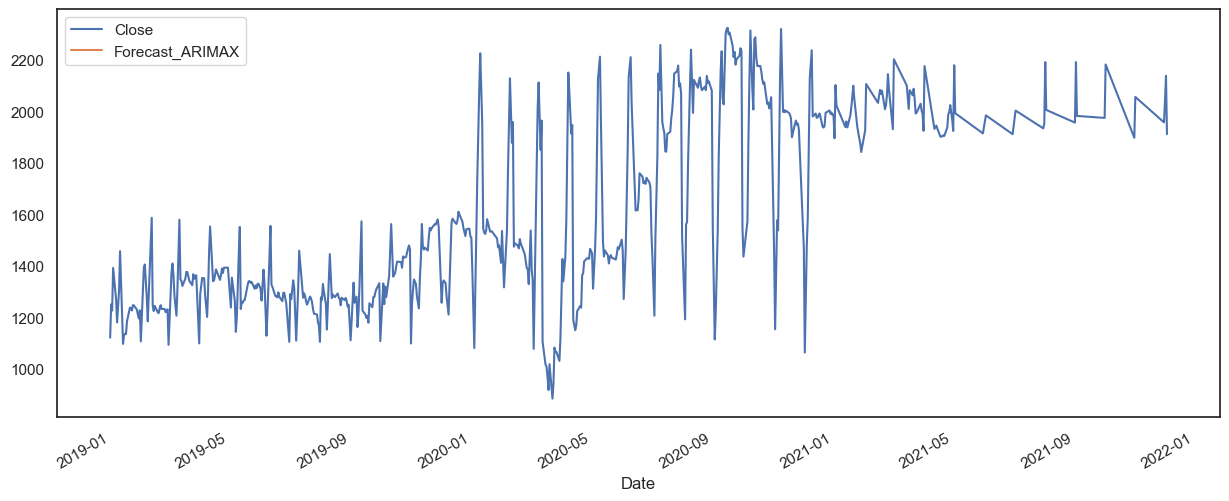

In [ ]:
# df_valid[["VWAP","Forecast_ARIMAX"]].plot(figsize=(14, 7))
valid[["Close", "Forecast_ARIMAX"]].plot()